### Read the results csv

Analyse what we got from the evaluation of the locators

In [1]:
import pandas as pd
import os
import numpy as np


def extract_files_for_project(project_name, target_dir):
    lg_file,num_located,skipped,locators=None,None,None,None
    for file_name in os.listdir(target_dir):
        if file_name.startswith("locators_generation") and file_name.endswith(f"{project_name}.csv"):
            lg_file=file_name
        elif file_name.endswith(f"{project_name}_located.csv"):
            num_located=file_name
        elif file_name.endswith(f"{project_name}_skipped.csv"):
            skipped=file_name
        elif file_name.endswith(f"{project_name}.csv"):
            locators=file_name
    return lg_file,num_located,skipped,locators

root_dir="C:\\Users\\hilal.taha\\PycharmProjects\\pythonProject\\database\\statistics\\"
lg_files,num_locateds,skippeds,locatorss=[],[],[],[]
for model in os.listdir(root_dir+"trained_models"):
    project_name = model[:len(model) - 14]
    lg_file, num_located, skipped, locators = extract_files_for_project(project_name, root_dir+"evaluation_data\\")
    if lg_file is None or num_located is None or skipped is None or locators is None:
        continue
    lg_files.append(lg_file)
    num_locateds.append(num_located)
    skippeds.append(skipped)
    locatorss.append(locators)

## Calculate the accuracies and robustness

We loop per row, calculate the accuracy(recoil) on each row, seperating the SEL and RELOC locators
Then at the end of the rows, we divide on the number of rows to get the average accuracy.

### Robustness 
It is the duration of survival of the locator

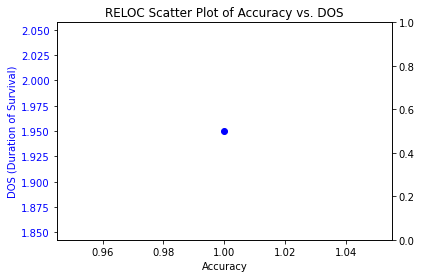

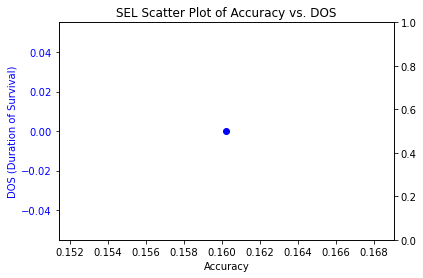

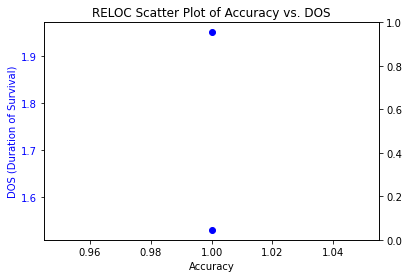

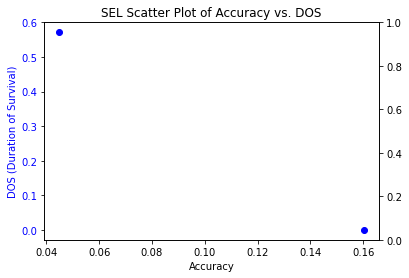

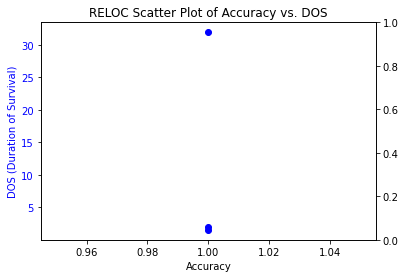

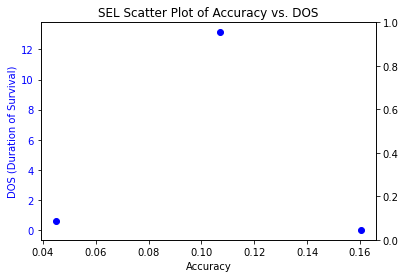

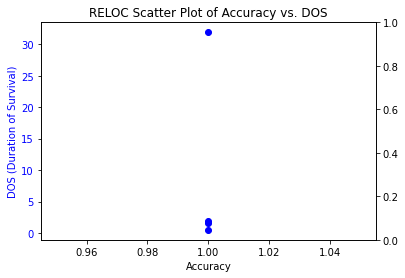

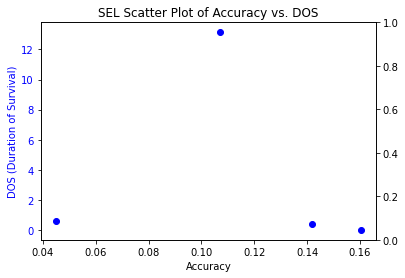

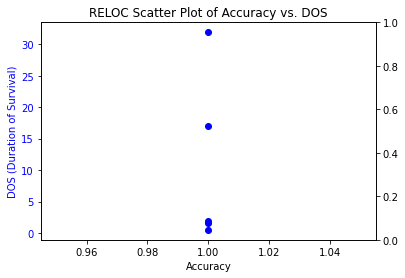

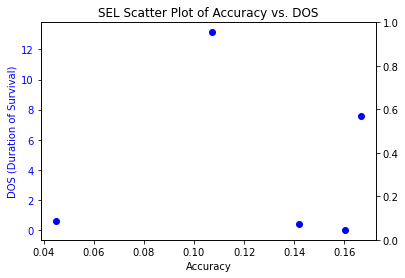

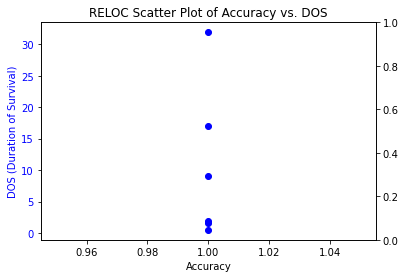

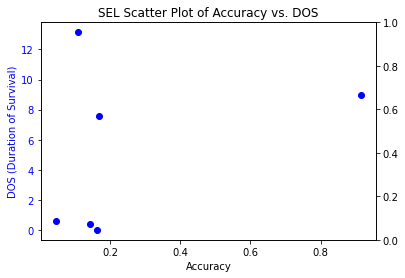

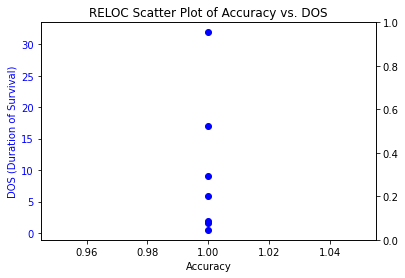

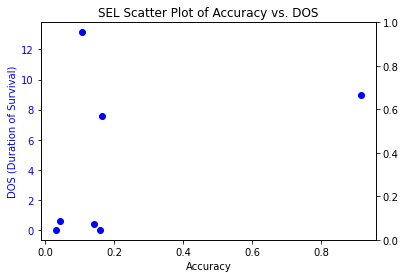

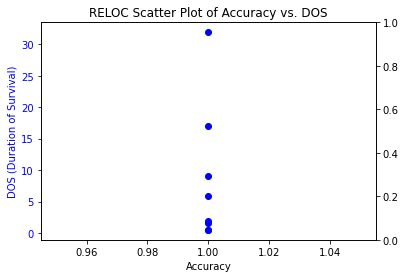

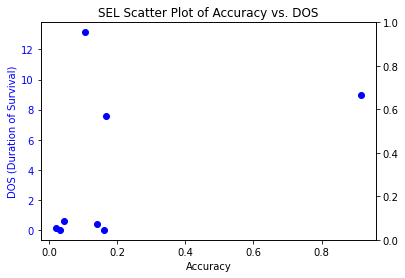

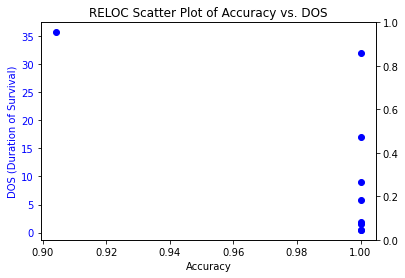

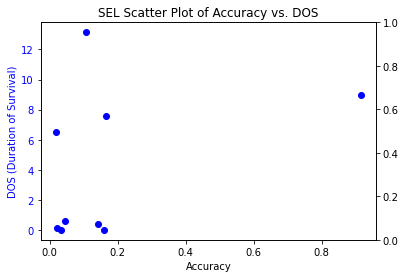

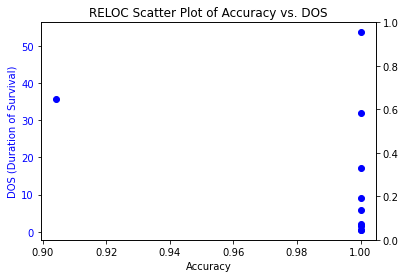

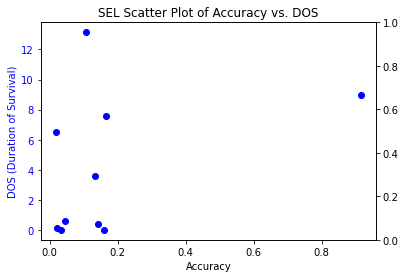

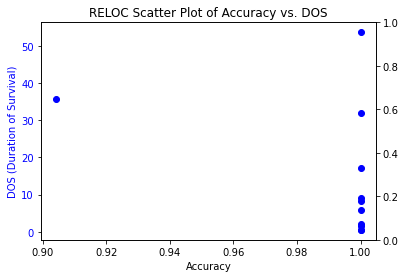

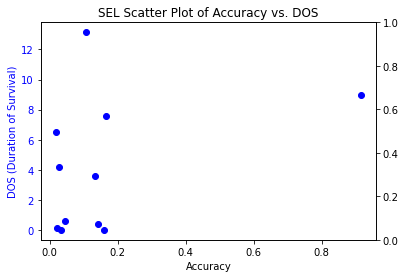

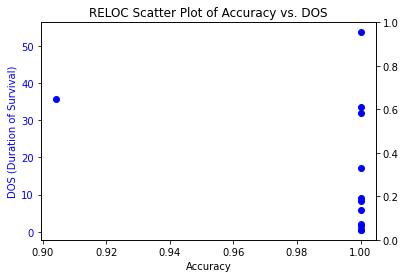

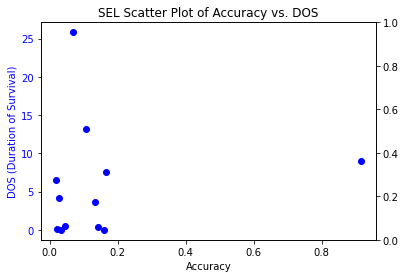

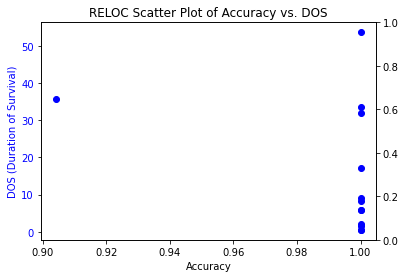

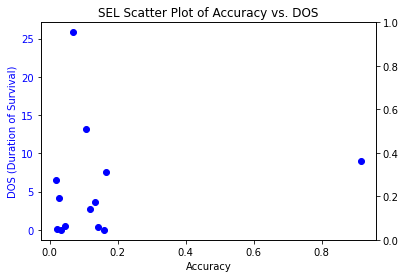

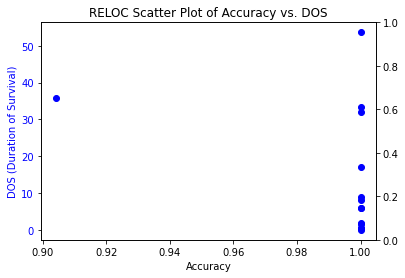

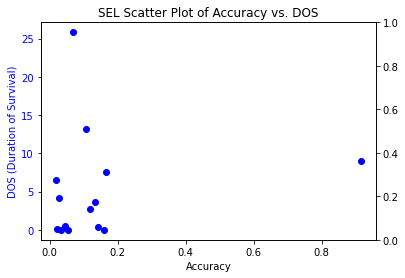

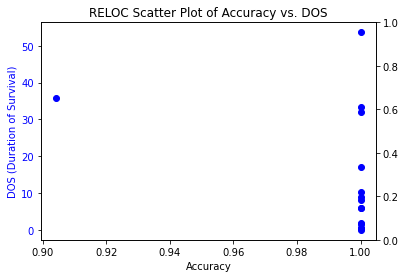

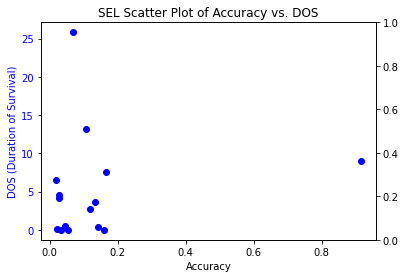

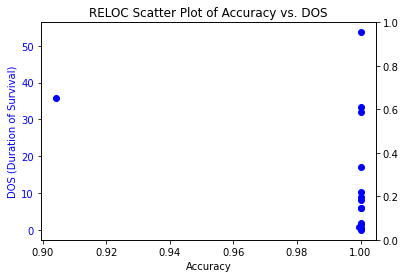

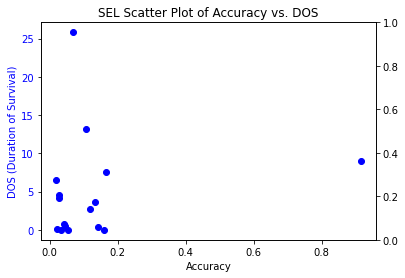

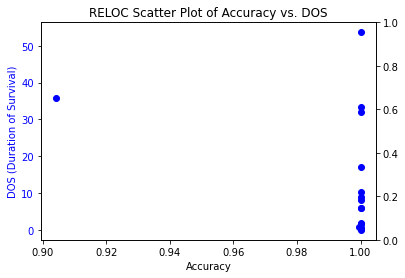

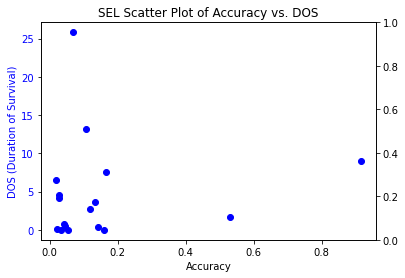

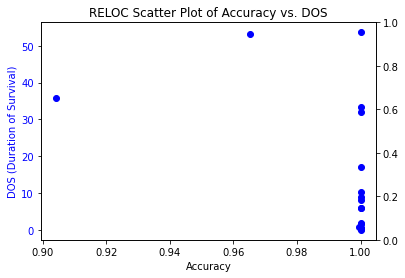

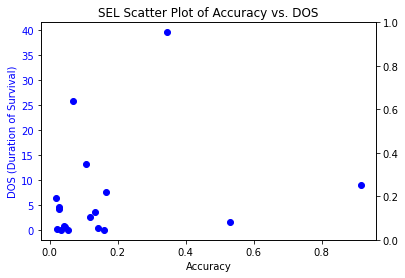

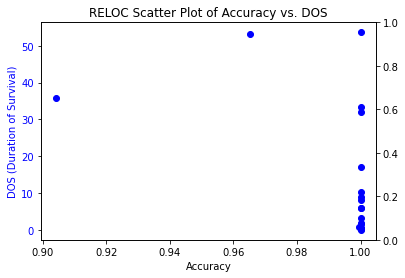

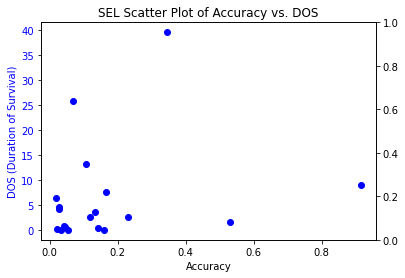

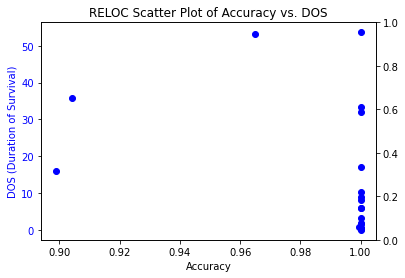

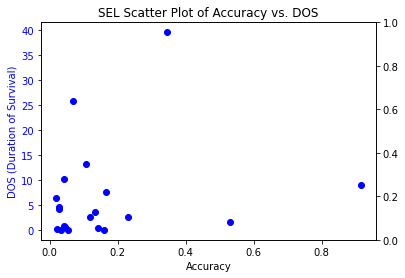

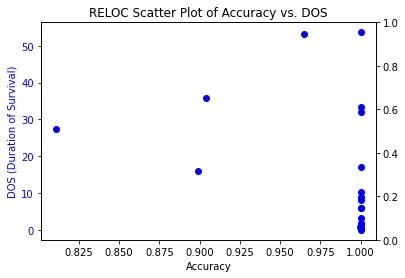

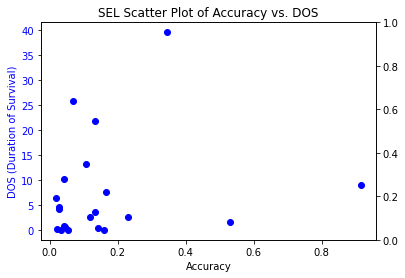

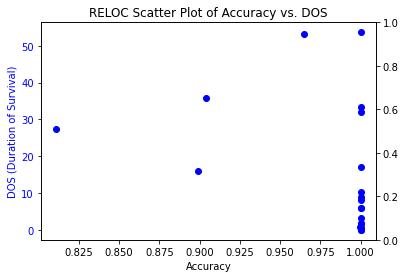

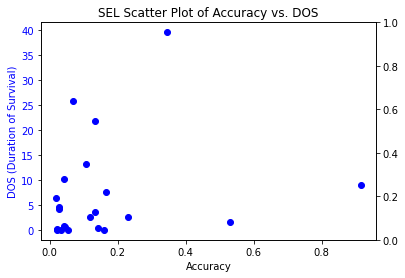

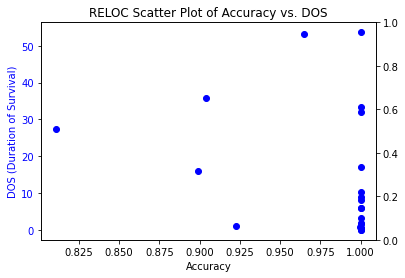

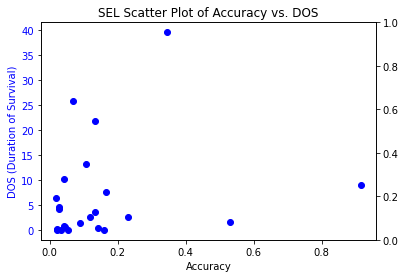

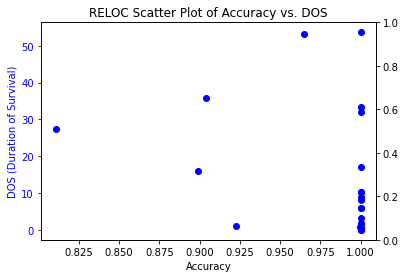

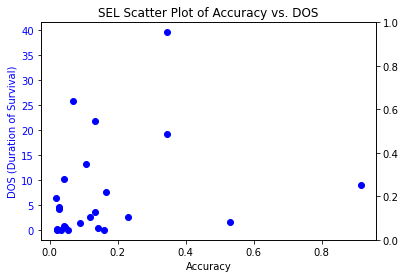

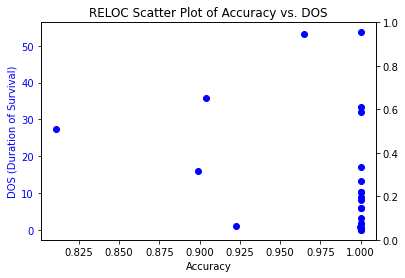

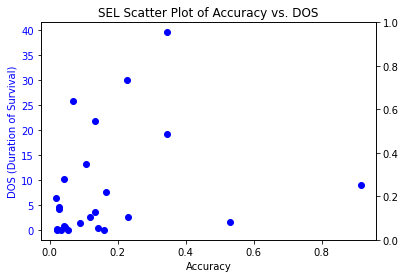

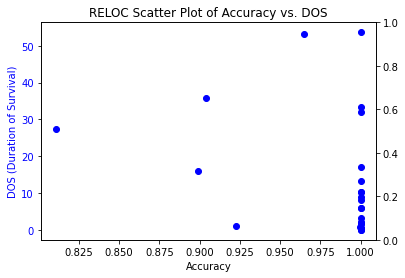

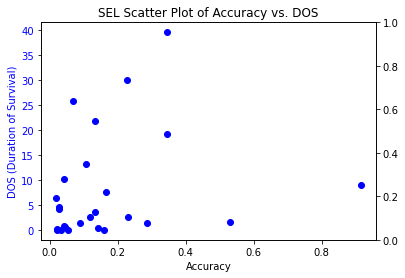

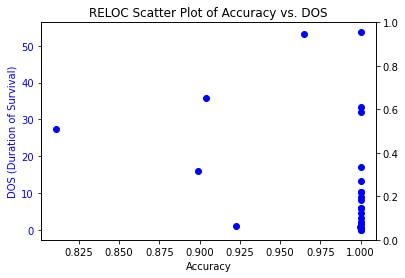

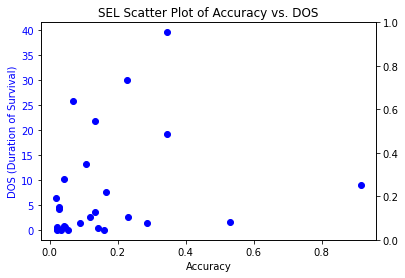

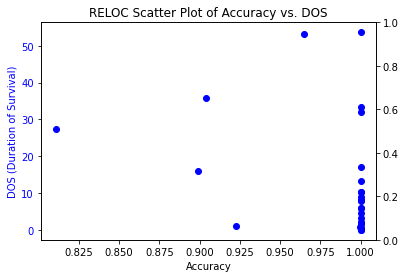

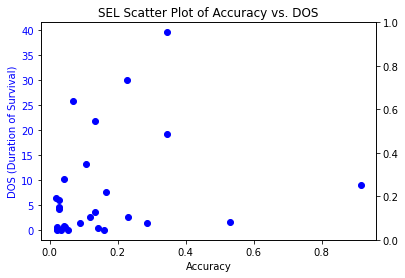

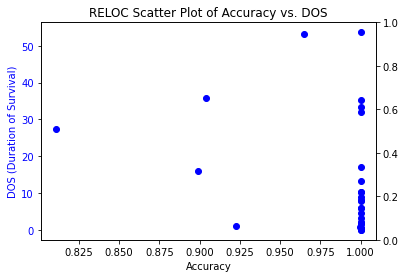

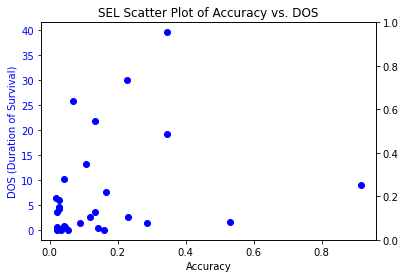

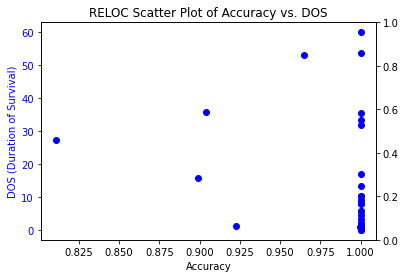

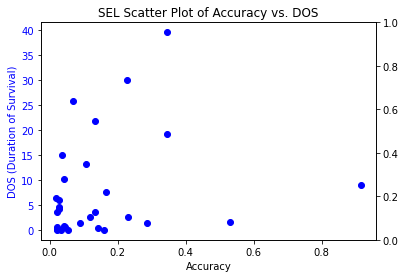

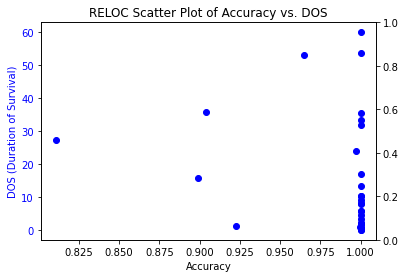

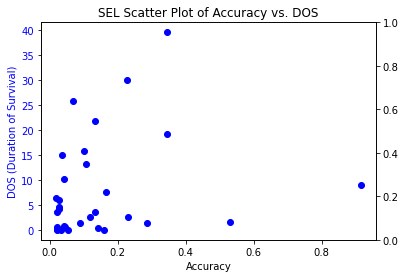

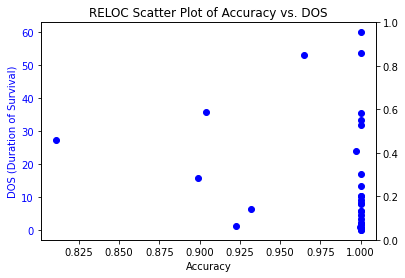

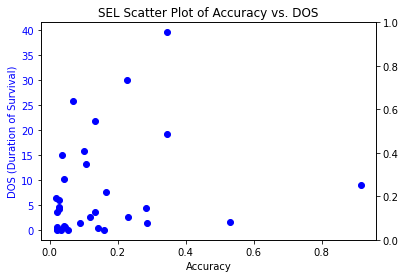

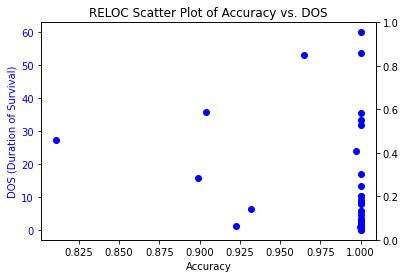

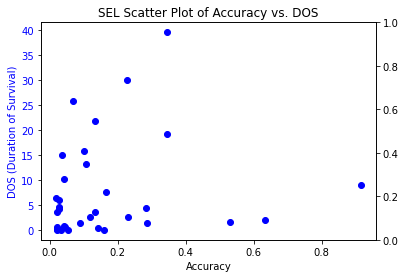

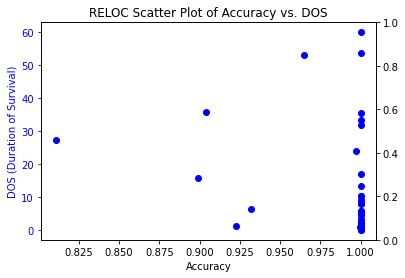

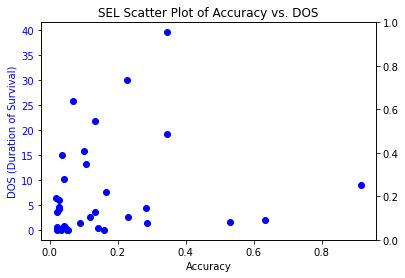

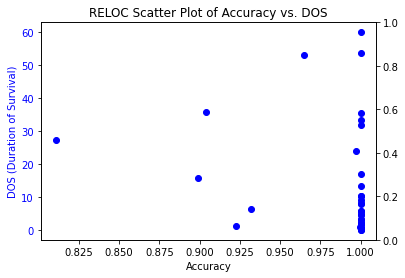

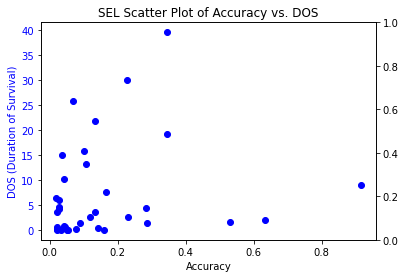

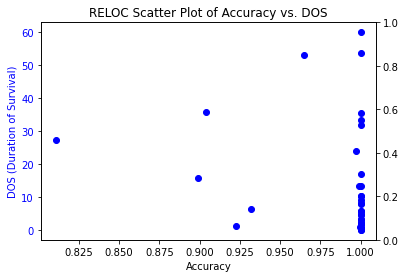

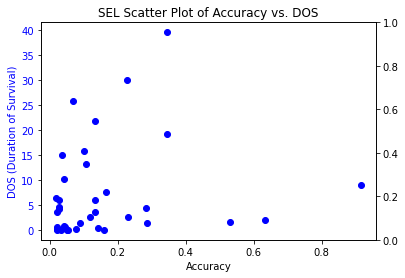

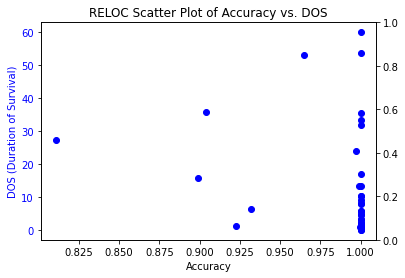

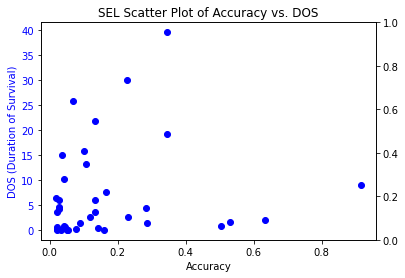

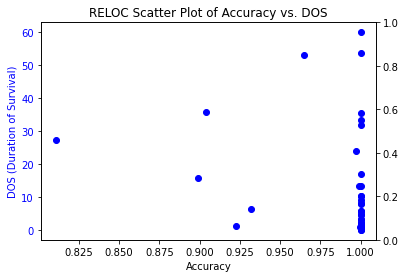

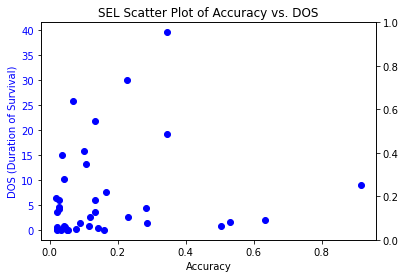

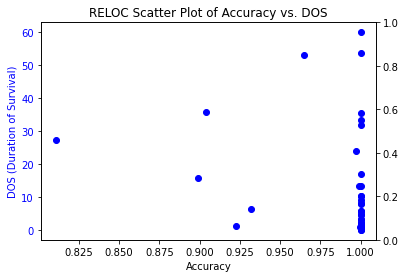

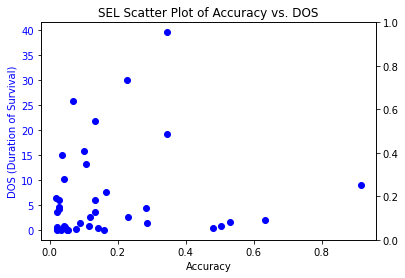

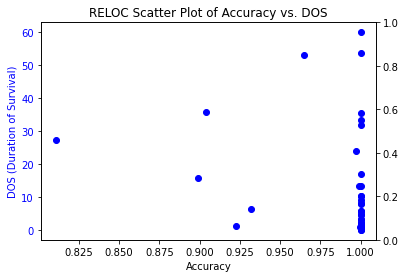

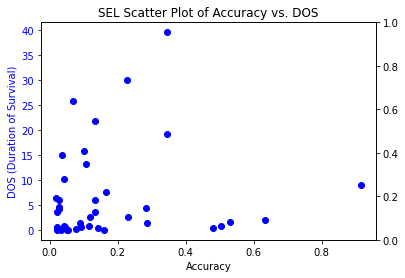

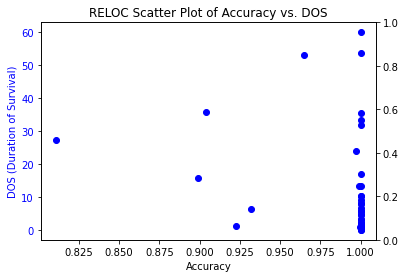

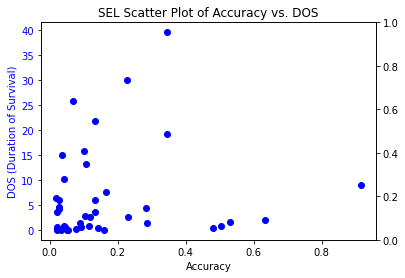

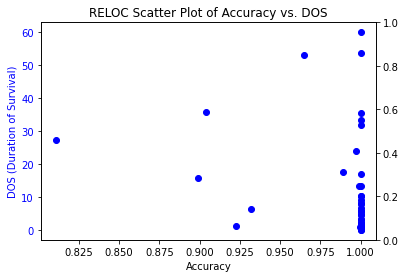

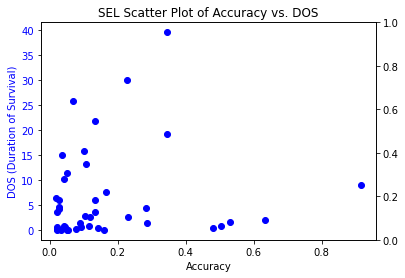

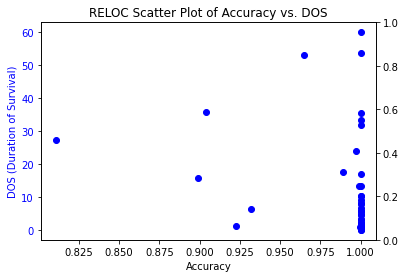

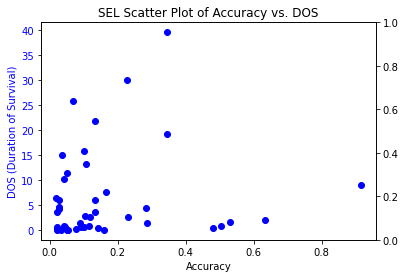

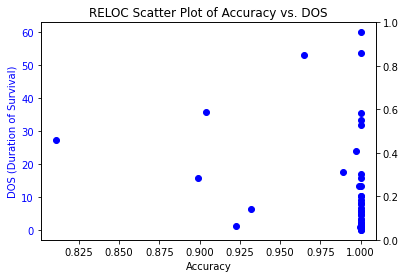

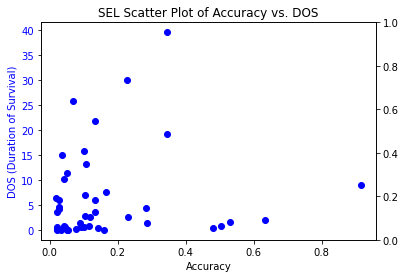

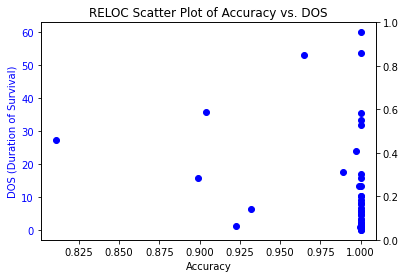

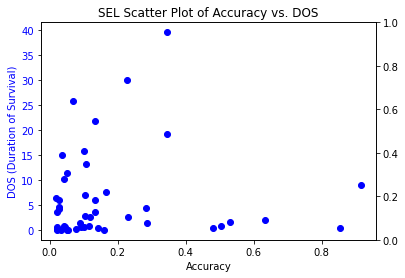

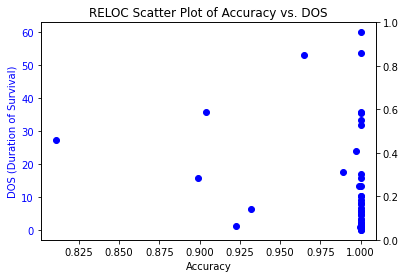

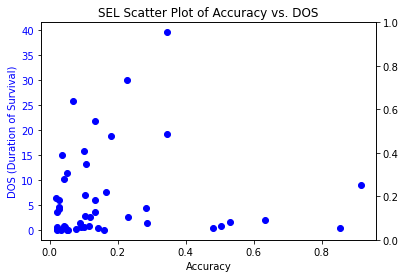

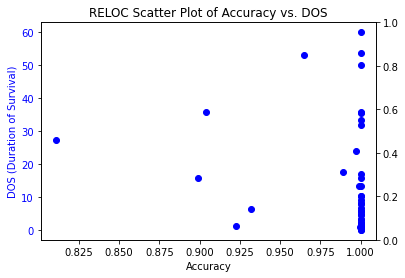

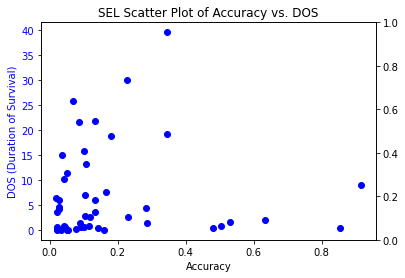

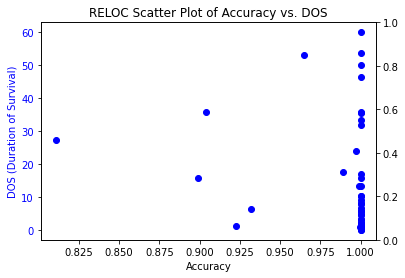

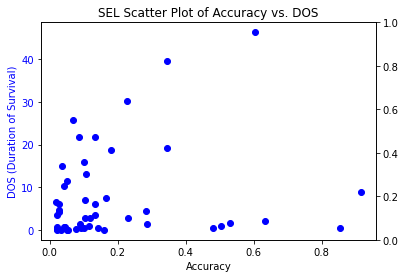

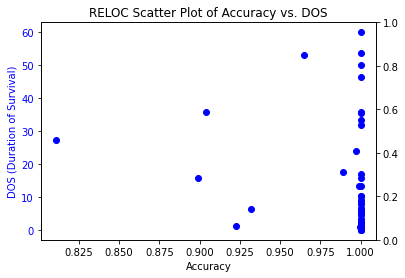

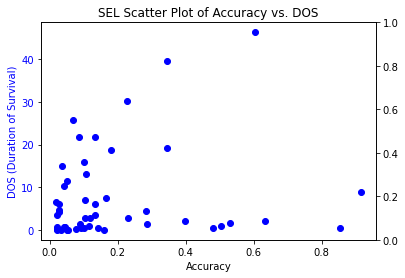

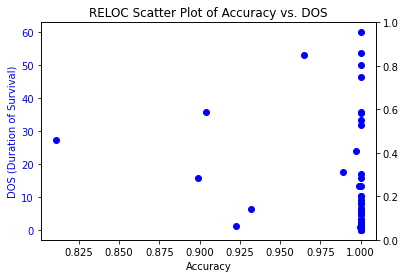

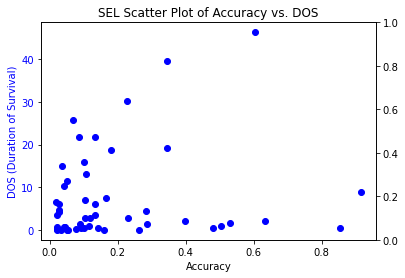

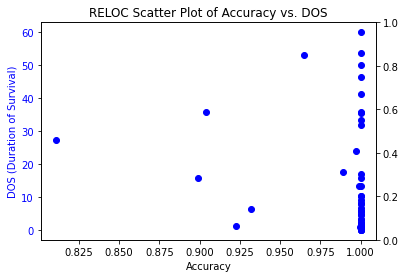

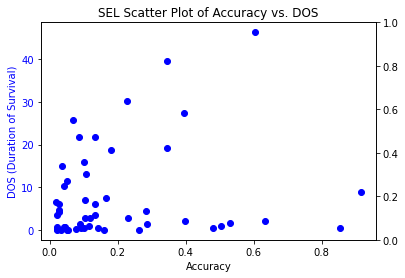

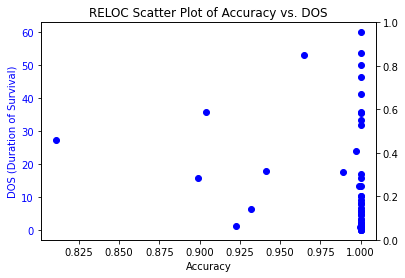

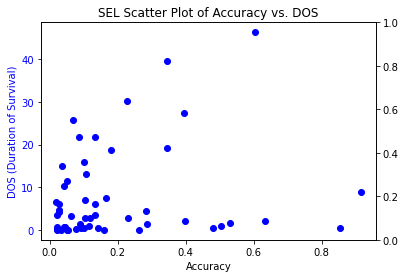

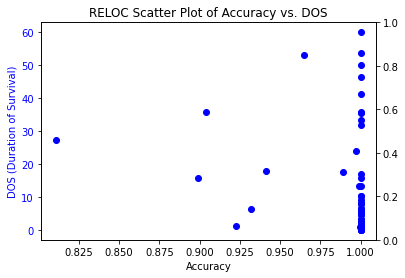

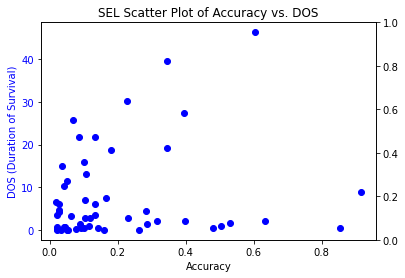

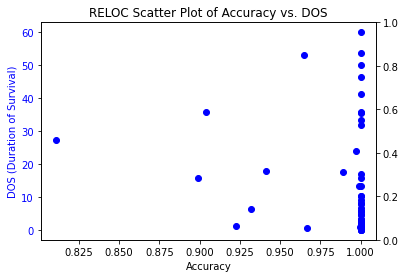

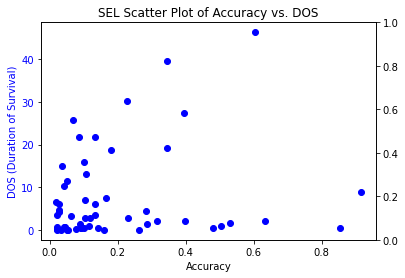

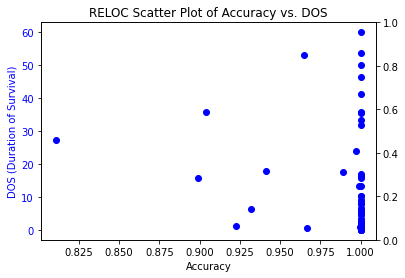

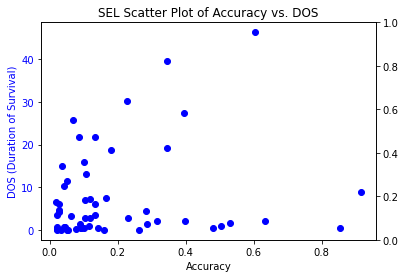

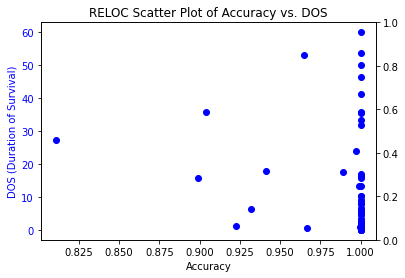

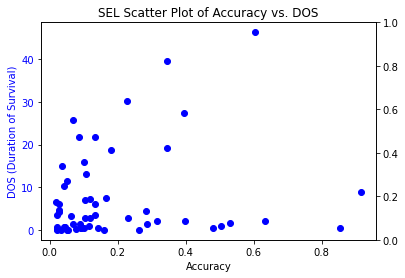

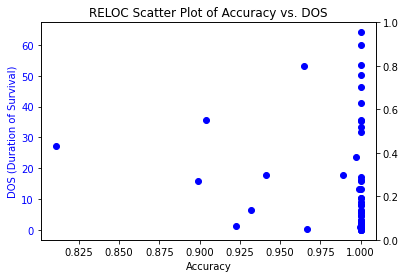

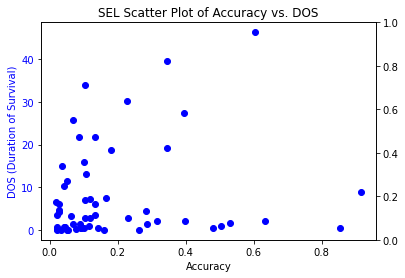

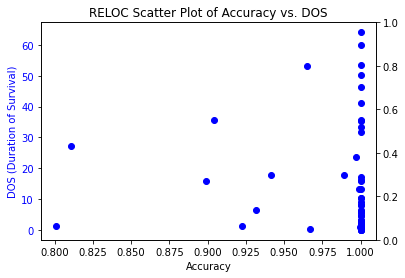

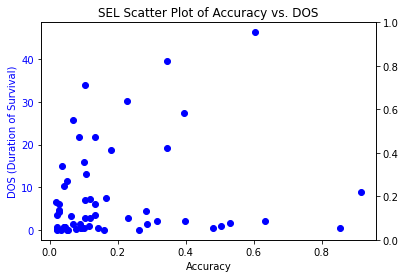

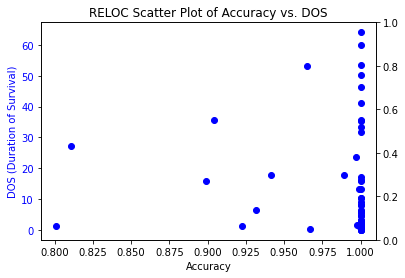

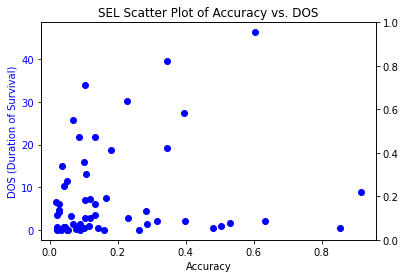

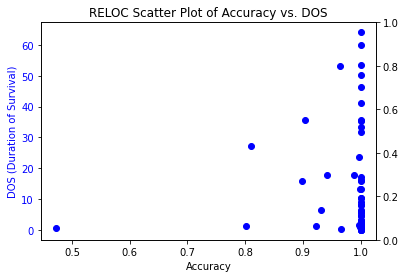

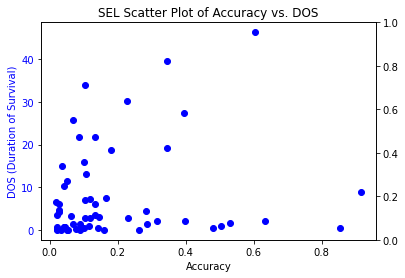

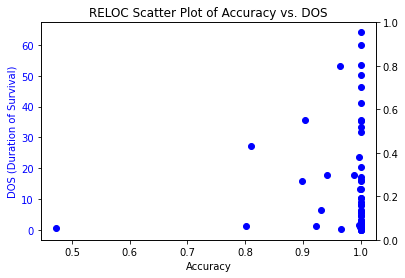

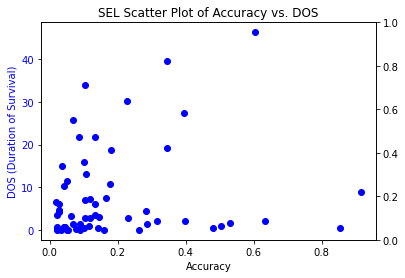

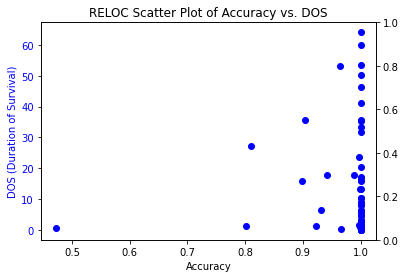

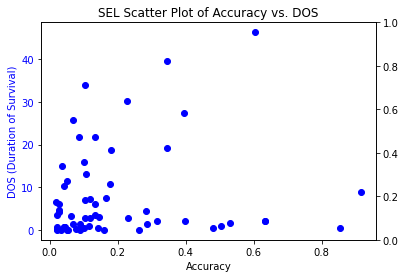

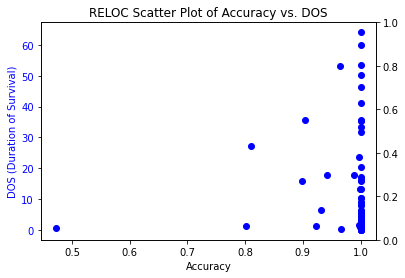

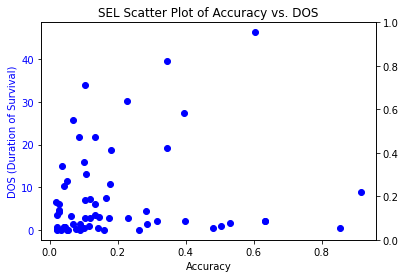

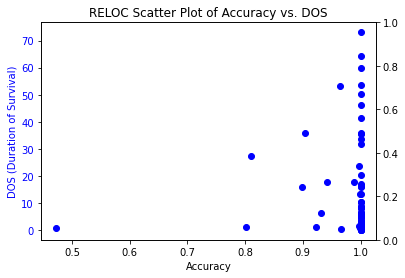

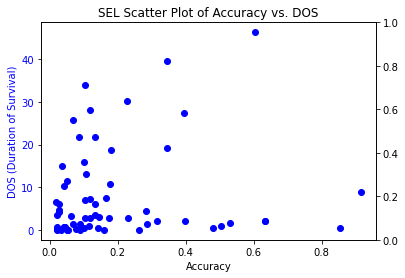

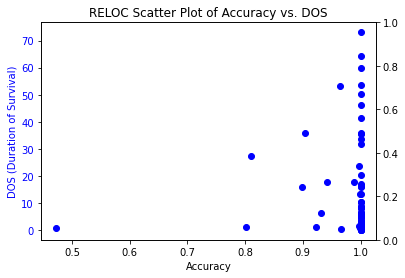

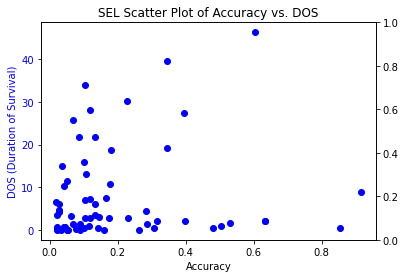

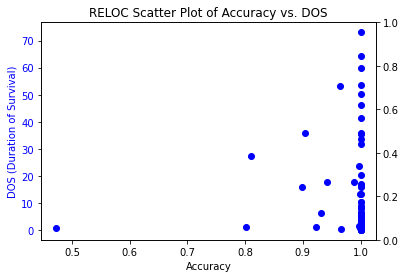

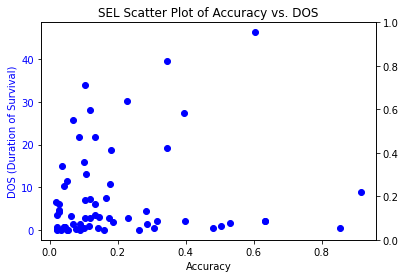

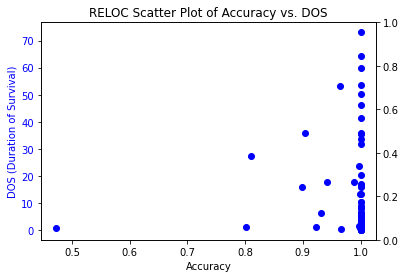

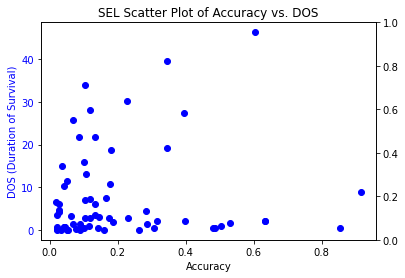

unsupported operand type(s) for -: 'str' and 'int'


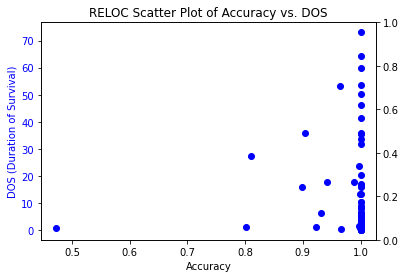

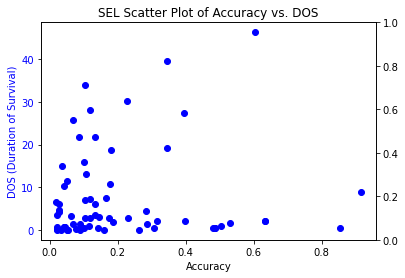

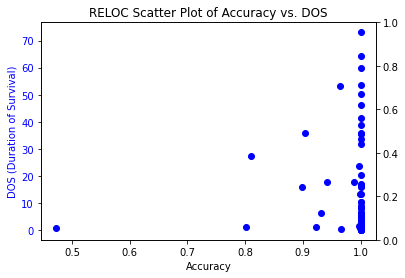

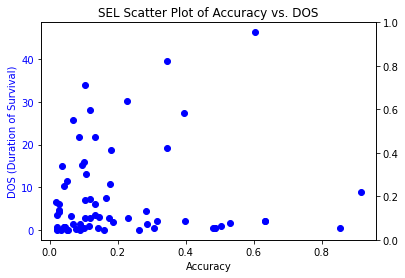

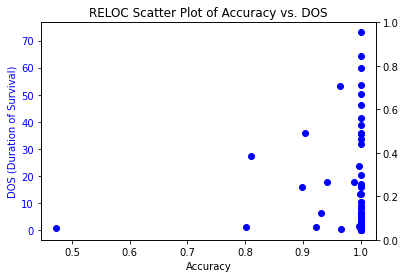

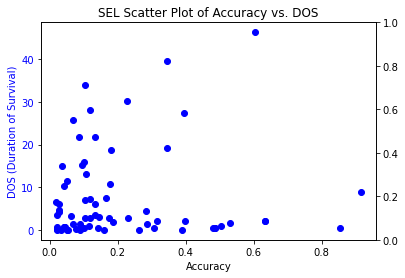

unsupported operand type(s) for -: 'str' and 'int'


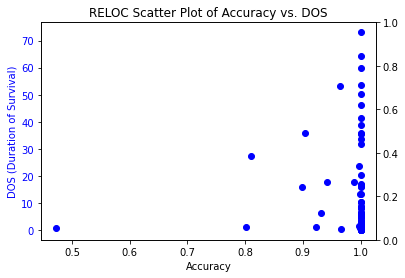

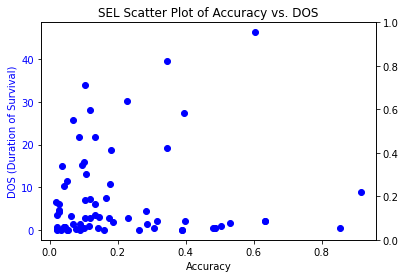

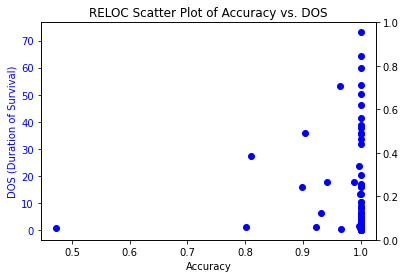

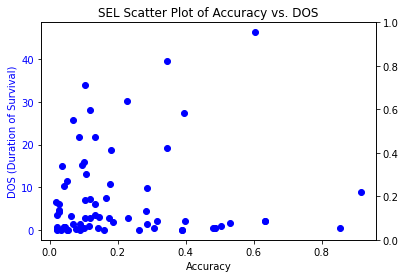

unsupported operand type(s) for -: 'str' and 'int'


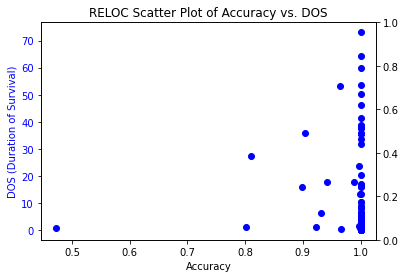

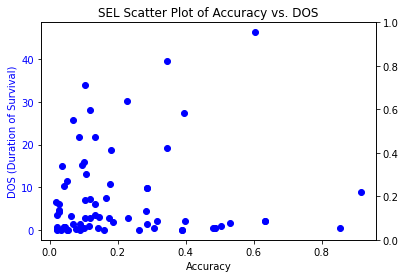

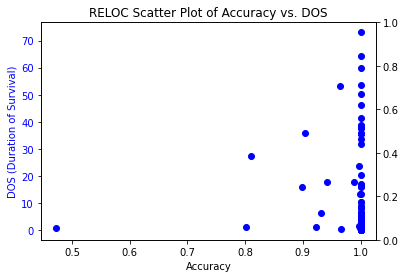

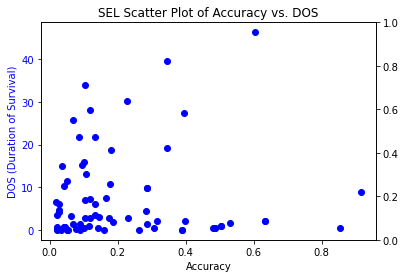

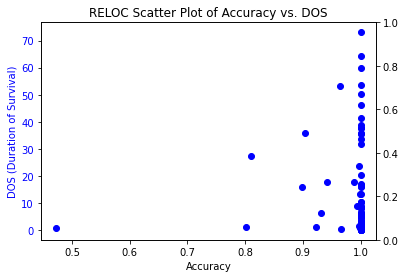

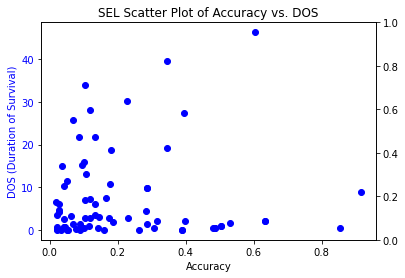

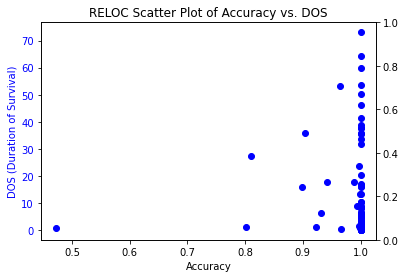

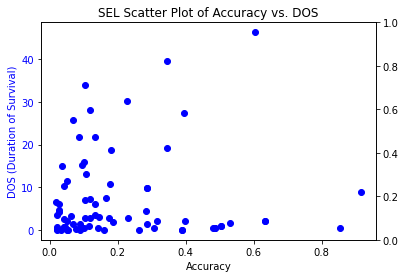

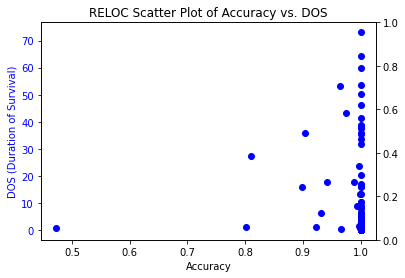

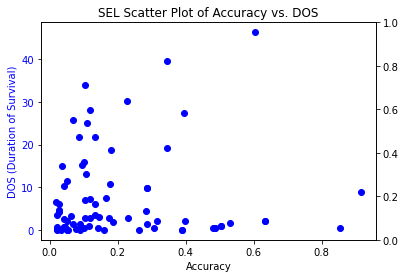

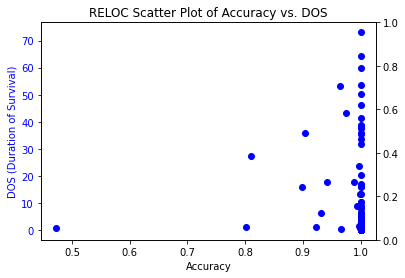

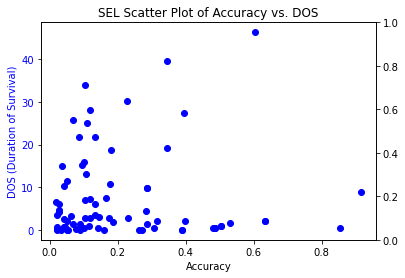

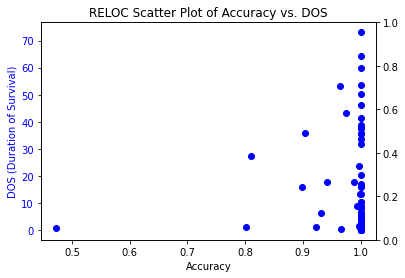

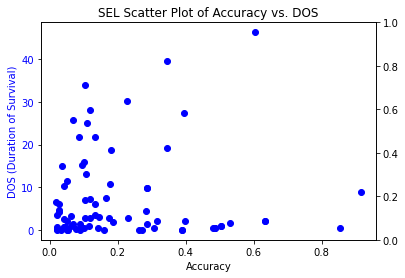

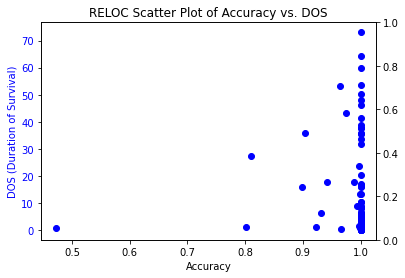

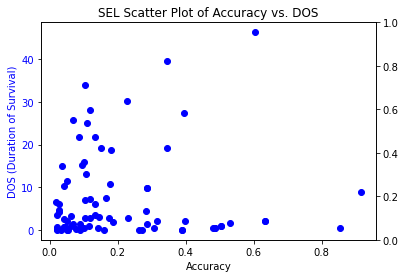

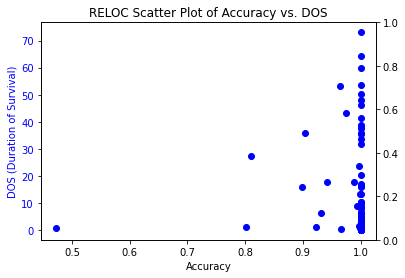

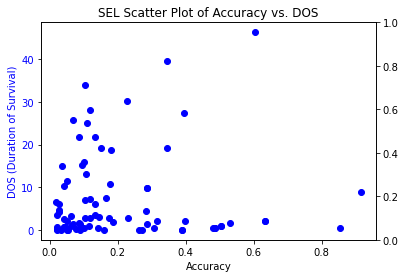

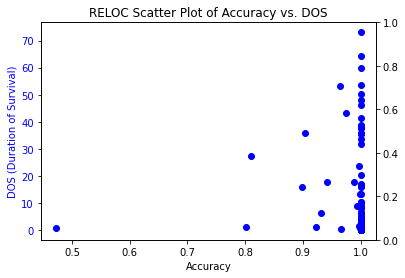

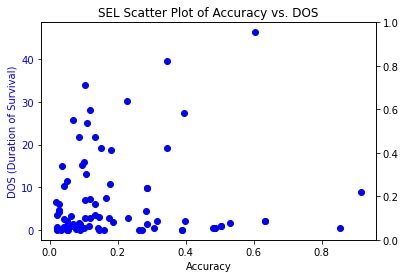

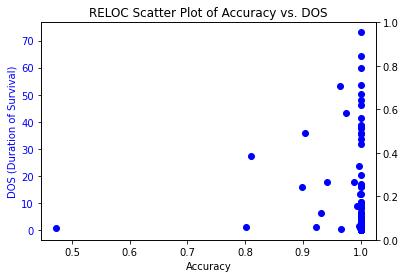

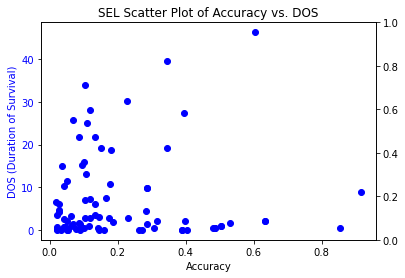

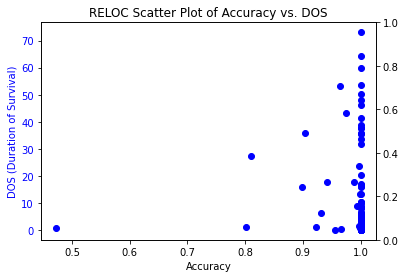

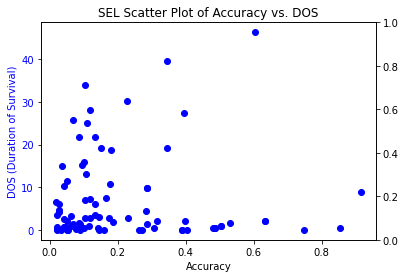

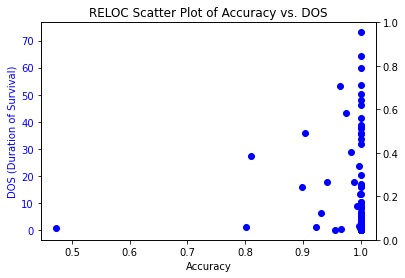

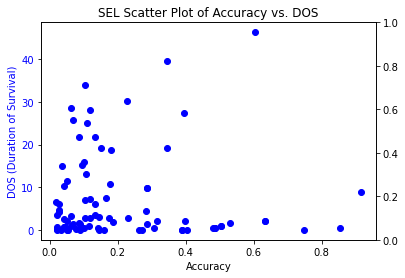

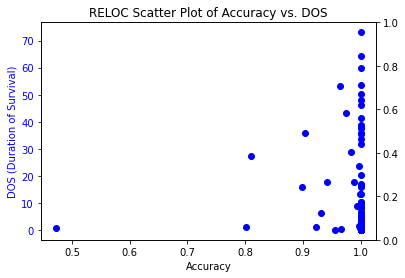

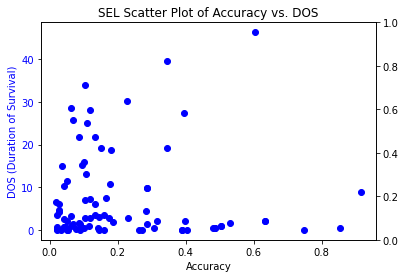

unsupported operand type(s) for -: 'str' and 'int'


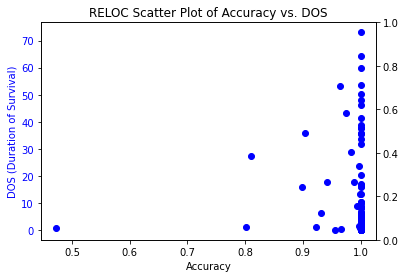

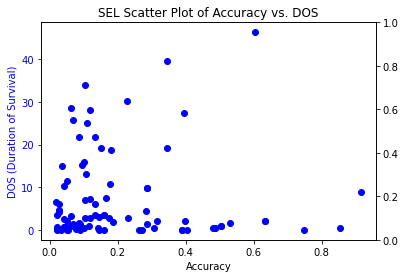

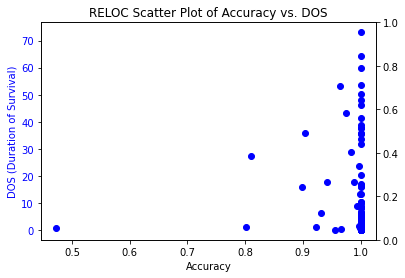

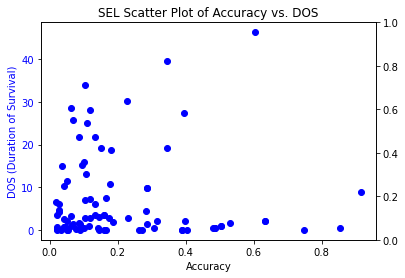

unsupported operand type(s) for -: 'str' and 'int'


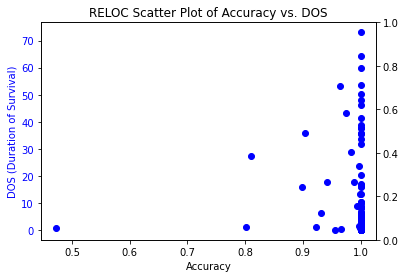

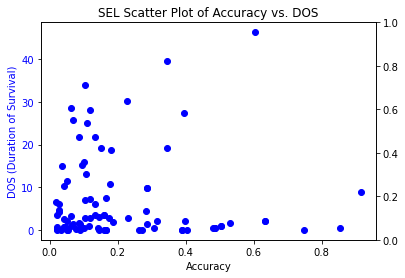

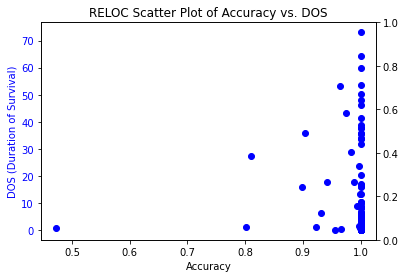

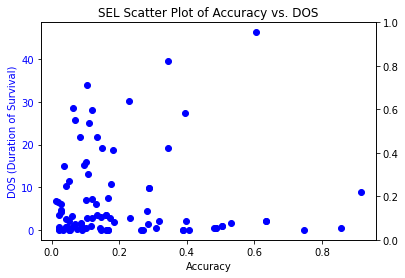

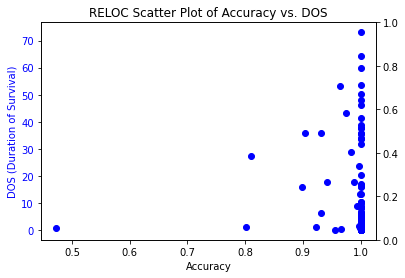

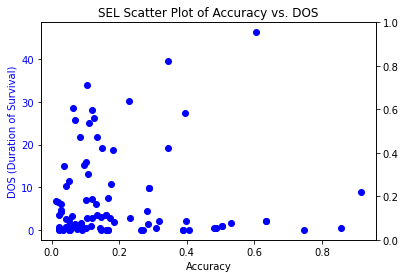

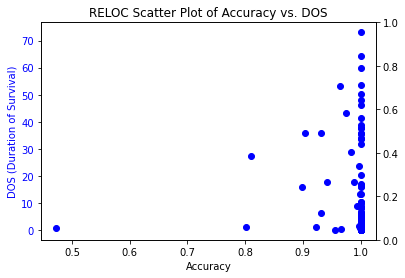

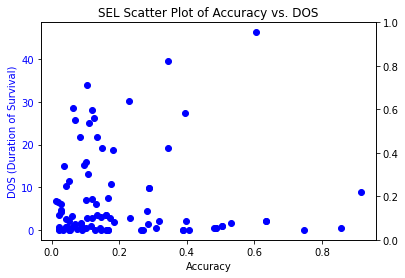

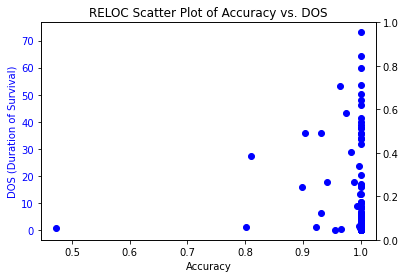

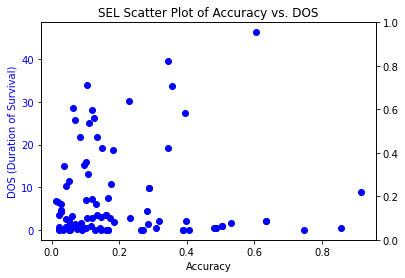

unsupported operand type(s) for -: 'str' and 'int'


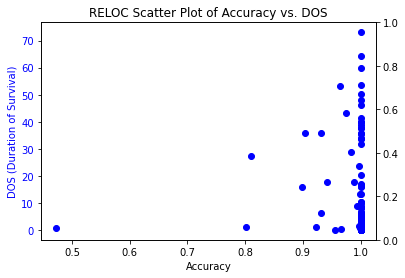

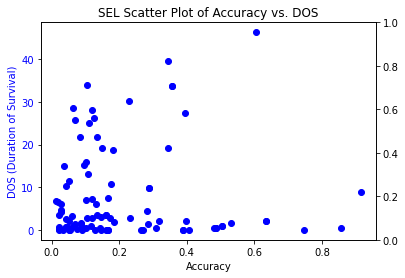

unsupported operand type(s) for -: 'str' and 'int'


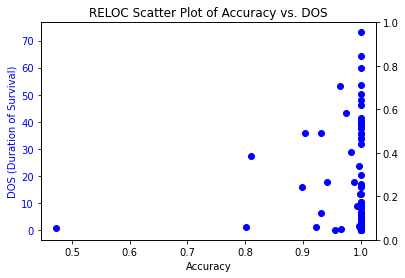

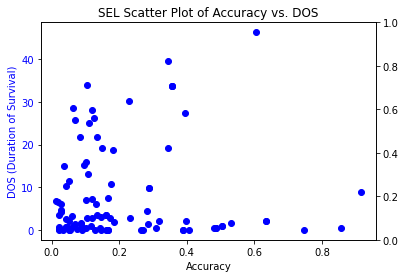

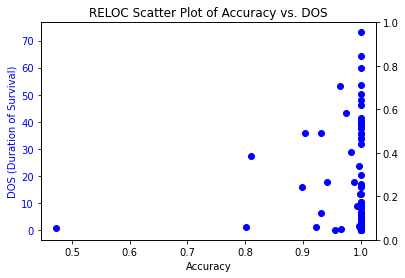

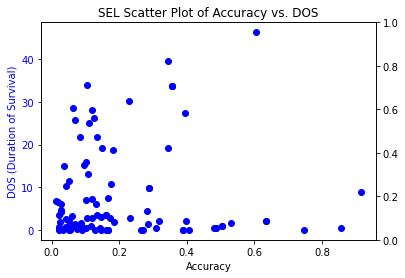

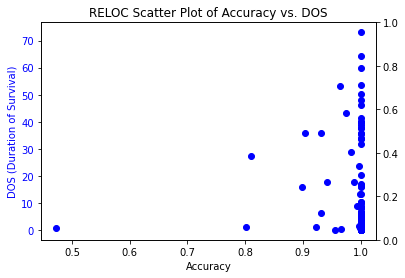

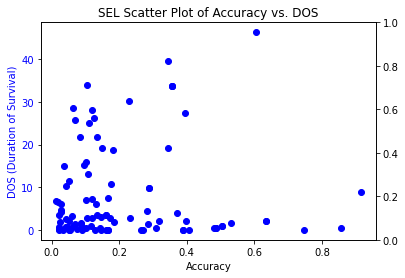

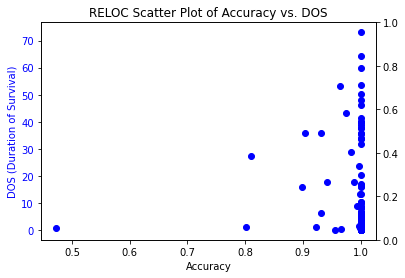

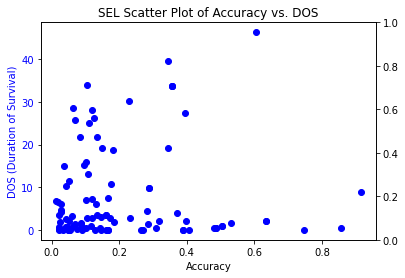

unsupported operand type(s) for -: 'str' and 'int'


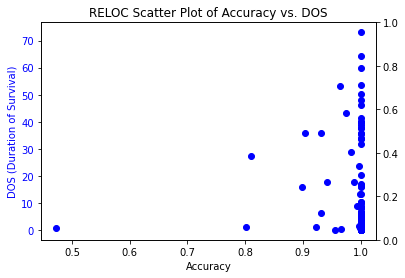

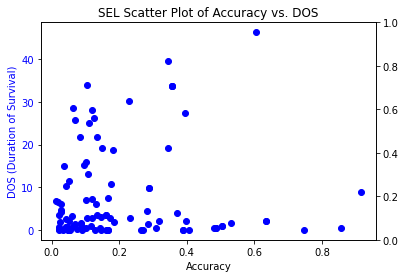

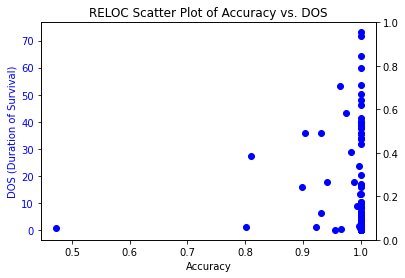

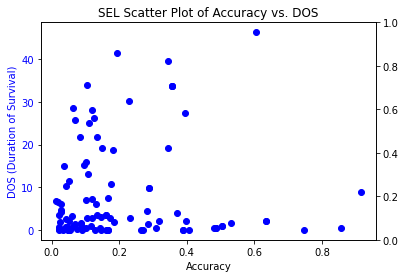

unsupported operand type(s) for -: 'str' and 'int'


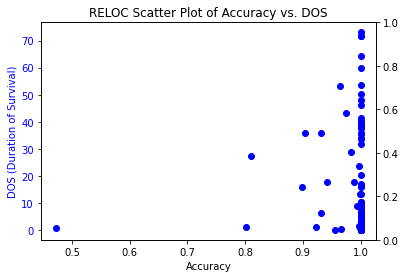

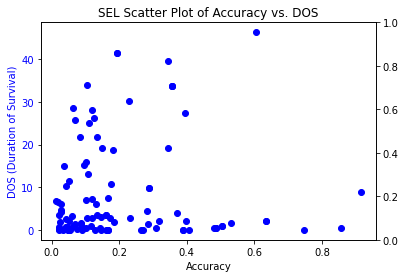

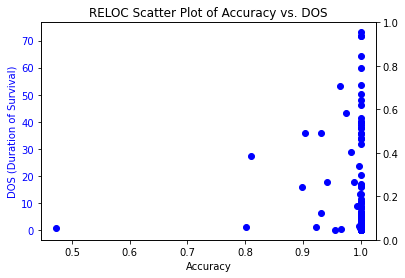

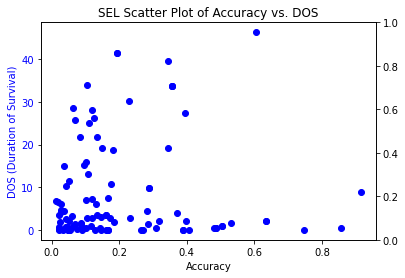

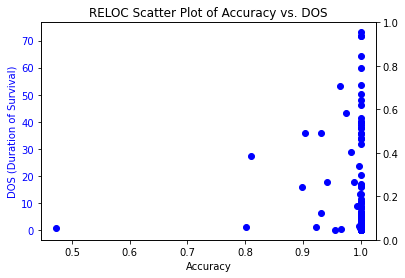

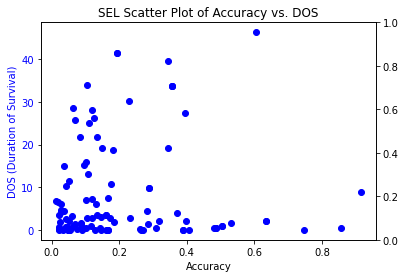

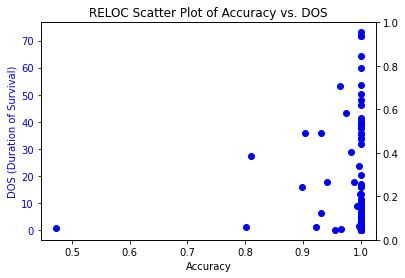

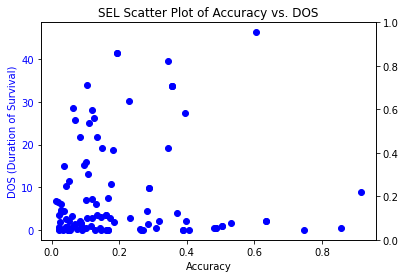

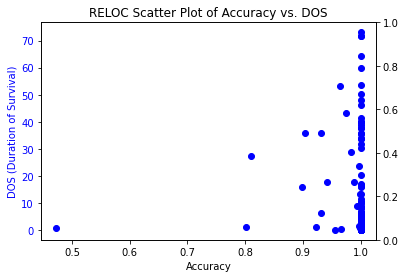

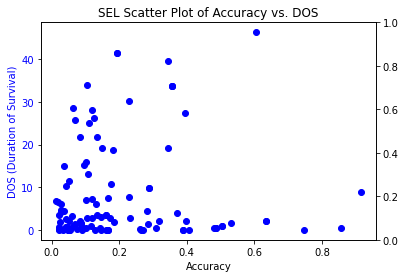

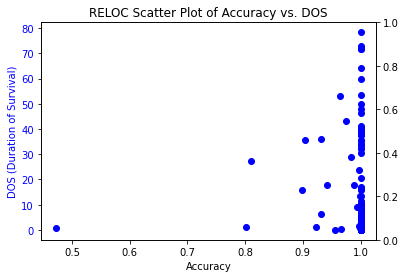

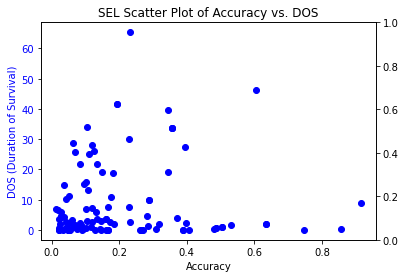

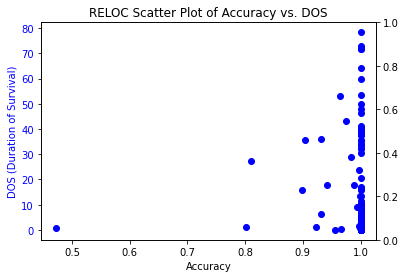

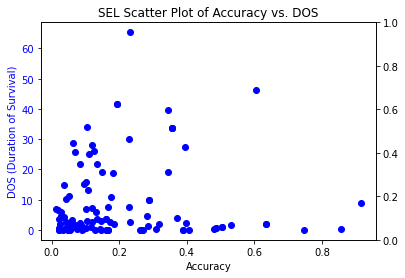

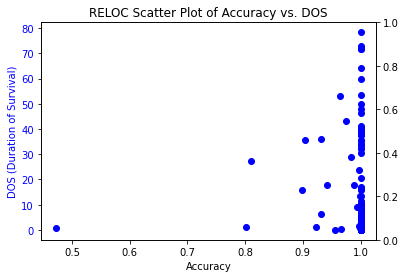

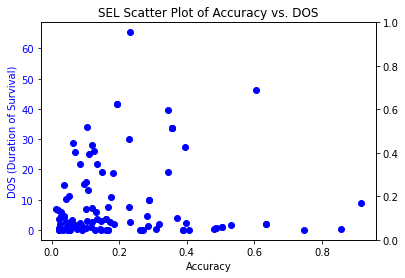

unsupported operand type(s) for -: 'str' and 'int'


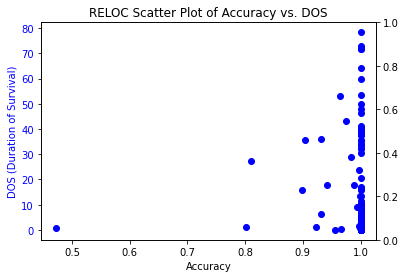

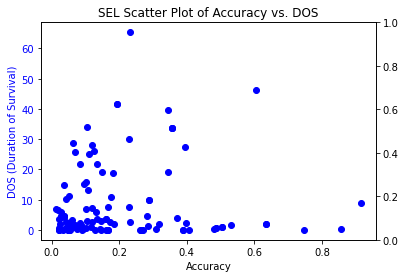

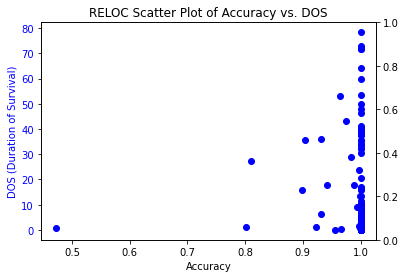

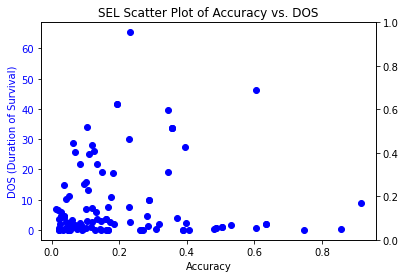

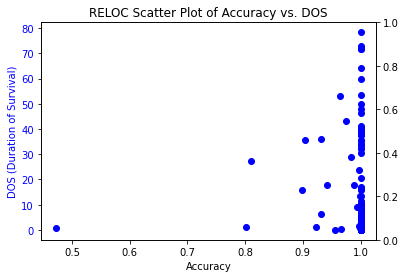

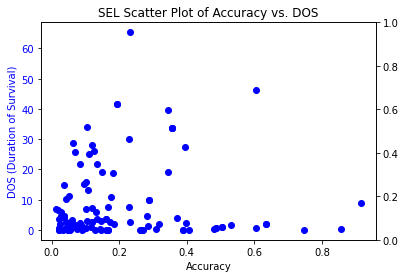

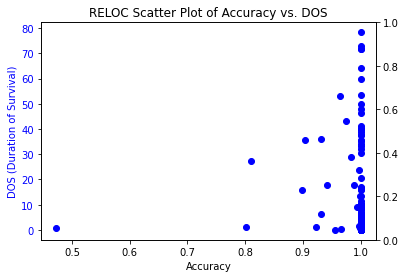

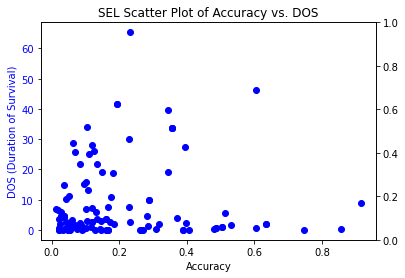

In [204]:
import re
import matplotlib.pyplot as plt

def calculate_duration_of_survival(col,dos=1):
    survival_duration = 0
    consecutive_zeros = 0
    for value in col[::-1]:
#         if value == 0:
        if value != 1:
            consecutive_zeros += 1
            if consecutive_zeros == dos:
                break
        else:
            survival_duration += 1
            consecutive_zeros = 0
    return survival_duration

def calculate_locator_length(col):
    locator_name = col.name  # Get the column name (locator name)
    locator_parts = re.split('/', locator_name.replace('//','/'))  # Split on '/ ' and '//'
    locator_length = len(locator_parts)
    if locator_name[-6:]=="_RELOC" or locator_name[:5]=="xpath":
        locator_length=locator_length-1
    return locator_length

def calculate_accuracy(col):
    TP=0
    FP=0
    for value in col[::-1]:
        if value > 0:
            TP+=1
            FP+=value-1
    if TP+FP==0:
        return 0
    return TP/(TP+FP)

def replace_greater_than_one(x):
    return 1 if x > 1 else x

def compute_reloc_recoil(row):
    row_series = pd.Series(row)
    positives_count = (row_series[reloc_columns] > 0).sum()
    zero_count = len(row_series[reloc_columns]) - positives_count
    tp_count = positives_count
    fp_count =  row_series[reloc_columns].sum() - positives_count
    if tp_count + fp_count == 0:
        selected_ratio = -1  # Avoid division by zero
    else:
        selected_ratio = tp_count / (tp_count + fp_count)
    
    return selected_ratio


def compute_sel_recoil(row):
    row_series = pd.Series(row)
    
    positives_count = (row_series[sel_columns] > 0).sum()
    zero_count = len(row_series[sel_columns]) - positives_count
    tp_count = positives_count
    fp_count =  row_series[sel_columns].sum() - positives_count
    
    if tp_count + fp_count == 0:
        selected_ratio = -1  # Avoid division by zero
    else:
        selected_ratio = tp_count / (tp_count + fp_count)
    
    return selected_ratio

sel_columns=[]
reloc_columns = None
xpath_sel_columns = None
class_sel_columns = None
name_sel_columns = None
id_sel_columns = None
tag_sel_columns = None
link_sel_columns = None
all_columns = None
df_d=None
accuracies_RELOC,dos_sel,accuracies_SEL,dos_RELOC=[],[],[],[]
winning_list,losing_list,tie_list = [],[],[]

for file in num_locateds:
    # Read the CSV file
#     print(file)
    try:
        df = pd.read_csv(root_dir+"evaluation_data\\"+file, index_col="Timestamp")
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    except Exception as e:
        print(e)
    # Step 2: Calculate the duration of survival for each locator
    reloc_columns = df.columns[df.columns.str.endswith("_RELOC")]
#     sel_columns = df.columns[df.columns.str.endswith("_SEL")]
    xpath_sel_columns = df.columns[df.columns.str.startswith("xpath") & df.columns.str.endswith("_SEL")]
    class_sel_columns = df.columns[df.columns.str.endswith("_SEL") & df.columns.str.startswith("class name")]
    name_sel_columns = df.columns[df.columns.str.endswith("_SEL") & df.columns.str.startswith("name")]
    id_sel_columns = df.columns[df.columns.str.endswith("_SEL") & df.columns.str.startswith("id")]
    tag_sel_columns = df.columns[df.columns.str.endswith("_SEL") & df.columns.str.startswith("tag name")]
    link_sel_columns = df.columns[df.columns.str.endswith("_SEL") & df.columns.str.startswith("link text")]
    all_columns = df.columns[df.columns.str.endswith("_RELOC") | df.columns.str.endswith("_SEL")]
#     df[xpath_sel_columns] = df[xpath_sel_columns].applymap(replace_greater_than_one)


#     dict_dos={}
#     sel_columns=[]
#     for col in df.columns:
#         if col.endswith("_SEL"):
#             dos= calculate_duration_of_survival(col)
#             dict_dos[col]=dos
#             if col.startswith("xpath"):
#                 sorted_dict = dict(sorted(dict_dos.items(), key=lambda item: item[1]))
#                 sel_columns.append(list(sorted_dict.items())[0][0])
#                 dict_dos={}
#     sel_columns=pd.Index(sel_columns)
    
    # Select the columns I want for evaluation
    min_dos=1000000
    column_to_add=None
    sel_columns=[]
    for col in df.columns:
        if col.endswith("_SEL"):
            if df[col].iloc[0]<min_dos and df[col].iloc[0]!= 0 :
                min_dos=dos
                column_to_add=col
            if col.startswith("xpath"):
                if column_to_add is None:
                    column_to_add=col
                else:
                    sel_columns.append(column_to_add)
                min_dos=1000000
                column_to_add=None
    sel_columns=pd.Index(sel_columns)
    
    # Iterate over all rows in the DataFrame to calculate accuracy
    total_acc_RELOC = 0
    total_acc_SEL = 0
    num_rows = len(df)

    reloc_excluded,sel_excluded=0,0
    for index, row in df.iterrows():
        recoil_reloc=compute_reloc_recoil(row)
        if recoil_reloc!=-1:
            total_acc_RELOC += recoil_reloc
        else:
            reloc_excluded+=1
        recoil_sel=compute_sel_recoil(row)
        if recoil_sel!=-1:
            total_acc_SEL += recoil_sel
        else:
            sel_excluded+=1
    if num_rows==reloc_excluded or num_rows==sel_excluded:
        continue
    average_acc_RELOC = total_acc_RELOC / (num_rows-reloc_excluded)
    average_acc_SEL = total_acc_SEL / (num_rows-sel_excluded)
    
    duration_of_survival = df[all_columns].apply(calculate_duration_of_survival)

    total_dos_SEL = 0
    total_dos_RELOC = 0
    winning_RELOC,losing_RELOC,tie_RELOC=0,0,0
    for index, (dos_SEL, dos_RELOC1) in enumerate(zip(duration_of_survival[sel_columns].values,
                                                     duration_of_survival[reloc_columns].values)):
        if dos_RELOC1 >dos_SEL:
            winning_RELOC += 1
        elif dos_RELOC1<dos_SEL:
            losing_RELOC+=1
        else:
            tie_RELOC+=1
        total_dos_SEL += dos_SEL
        total_dos_RELOC += dos_RELOC1

    average_dos_SEL = total_dos_SEL / len(duration_of_survival)
    average_dos_RELOC = total_dos_RELOC / len(duration_of_survival)
    
    accuracies_RELOC.append(average_acc_RELOC)
    accuracies_SEL.append(average_acc_SEL)
        
    dos_sel.append(average_dos_SEL)
    dos_RELOC.append(average_dos_RELOC)
    winning_list.append(winning_RELOC)
    losing_list.append(losing_RELOC)
    tie_list.append(tie_RELOC)
    
    locator_length = df[all_columns].apply(calculate_locator_length)
#     correlation_accuracy = accuracy.corr(duration_of_survival)
#     correlation_accuracy = accuracy.corr(locator_length)
    correlation_length = locator_length.corr(duration_of_survival)
#     print("Accuracy :"+str(correlation_accuracy))
#     print("Length :"+str(correlation_length))
    
    
    # Create a figure and a scatter plot
    fig, ax1 = plt.subplots()

    # Scatter plot on the first axis
    ax1.scatter(accuracies_RELOC, dos_RELOC, color='b')
    ax1.set_xlabel('Accuracy')
    ax1.set_ylabel('DOS (Duration of Survival)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()
    plt.title('RELOC Scatter Plot of Accuracy vs. DOS')
    plt.show()
    
    
    fig, ax1 = plt.subplots()

    ax1.scatter(accuracies_SEL, dos_sel, color='b')
    ax1.set_xlabel('Accuracy')
    ax1.set_ylabel('DOS (Duration of Survival)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    plt.title('SEL Scatter Plot of Accuracy vs. DOS')
    plt.show()



In [206]:
from scipy import stats


alpha = 0.05
# Perform the Wilcoxon signed-rank test
statistic, p_value = stats.wilcoxon(dos_RELOC, dos_sel,alternative = 'greater')

print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The distributions are different.")
else:
    print("Fail to reject the null hypothesis: The distributions are similar.")
print()

statistic, p_value = stats.wilcoxon(accuracies_RELOC, accuracies_SEL,alternative = 'greater')

print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The distributions are different.")
else:
    print("Fail to reject the null hypothesis: The distributions are similar.")


Wilcoxon statistic: 4235.0
p-value: 1.9824509748024717e-13
Reject the null hypothesis: The distributions are different.

Wilcoxon statistic: 6328.0
p-value: 2.0468901761793473e-20
Reject the null hypothesis: The distributions are different.


In [207]:
winning=0
losing=0
tie=0
print("winning \t losing \t tie \t accuracy reloc \t accuracy sel")
for i in range(0,len(winning_list)):
    print(winning_list[i] , losing_list[i], tie_list[i],accuracies_RELOC[i],accuracies_SEL[i])
    
    
    winning+=winning_list[i] 
    losing+= losing_list[i]
    tie+=tie_list[i]
print(winning,losing,tie)

winning 	 losing 	 tie 	 accuracy reloc 	 accuracy sel
1 0 0 1.0 0.16021879021879018
8 1 11 1.0 0.044990775565157855
10 0 9 1.0 0.10712831786354002
2 0 18 1.0 0.14192451266518336
10 0 10 1.0 0.16646155932524415
1 1 18 1.0 0.9142949249332208
4 0 16 1.0 0.03252434547245209
3 0 17 1.0 0.02125446522336356
10 1 9 0.9041796528948216 0.01931072870950331
16 0 4 1.0 0.13392686454178854
11 5 4 1.0 0.02866439381191363
5 2 13 1.0 0.0689519414675244
7 1 12 1.0 0.11839059798714316
0 0 14 1.0 0.0539552646543937
6 1 13 1.0 0.026868978975254785
3 3 12 0.9996014348345954 0.041800220806257095
1 5 5 1.0 0.5314219641902435
5 1 14 0.9650822510822514 0.34502838916482653
4 1 14 1.0 0.2317073170731708
6 4 10 0.8989248268600488 0.04260924703438973
7 5 6 0.8108796296296293 0.13427346950527283
0 0 20 1.0 0.022633021337671304
2 3 6 0.9227957971676567 0.08825833427790558
0 4 16 1.0 0.3450865412856122
1 6 13 1.0 0.22878309781863015
7 2 11 1.0 0.28571428571428564
8 0 12 1.0 0.022308951305855067
10 1 9 1.0 0.027559262